## obtención de la mascara mediante el método OTSU

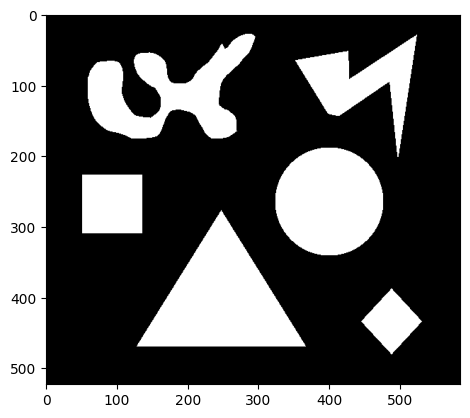

In [26]:
# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('img/figuras.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(img_gray,0,1,cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.show()

### Convertimos la imagen binaria en una imagen de etiquetas para tener acceso a cada objeto por separado

número de objetos:  6
posibles valores de intensidad:  [0 1 2 3 4 5 6]


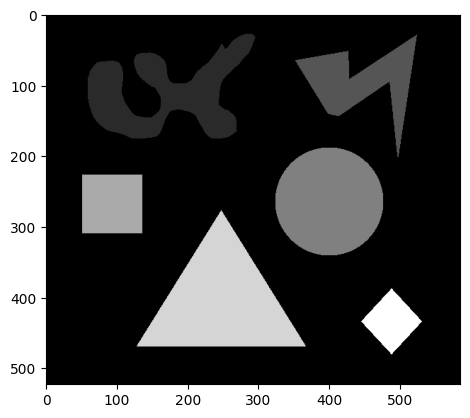

In [27]:
# Convertimos la imagen binaria en una imagen de etiquetas para tener acceso a cada objeto por separado
from skimage.measure import label

lab, num = label(mask, return_num=True)

# Importante:
# En 'num' devuelve 6 valores correspondientes a los 6 objetos que hay en la imagen.
# Sin embargo, 'lab' contiene hasta 7 valores diferentes, ya que también tiene en cuenta el fondo de la imagen.
print('número de objetos: ', num)
v,c = np.unique(lab, return_counts=True)
print('posibles valores de intensidad: ', v)

plt.imshow(lab, cmap='gray')
plt.show()

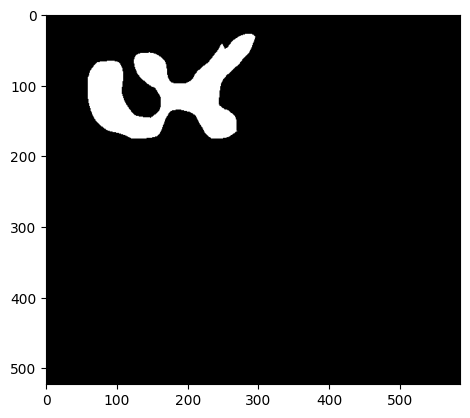

In [28]:
# Podemos acceder de manera independiente al objeto que nos interese a partir de su etiqueta correspondiente
objeto = lab == 1
objeto = objeto.astype('uint8')
plt.imshow(objeto, cmap='gray')
plt.show()

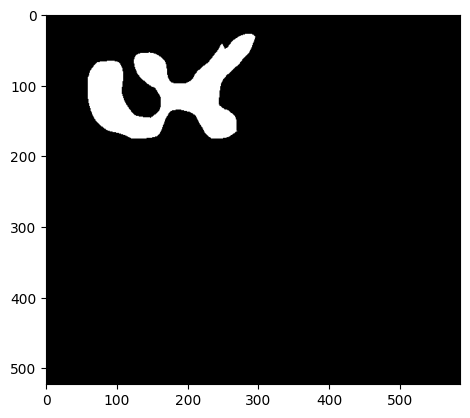

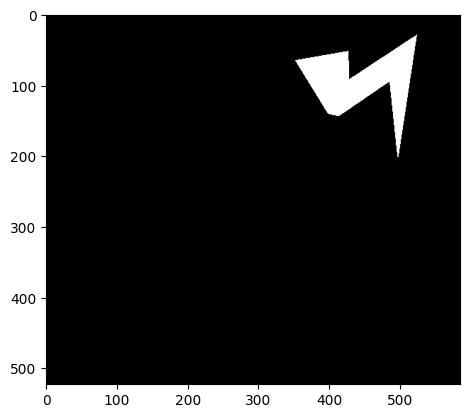

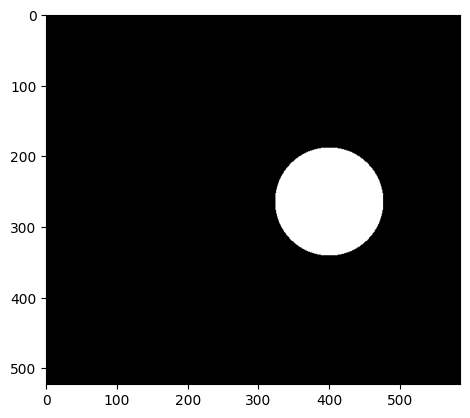

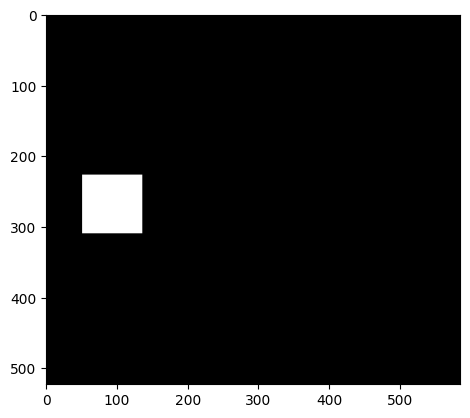

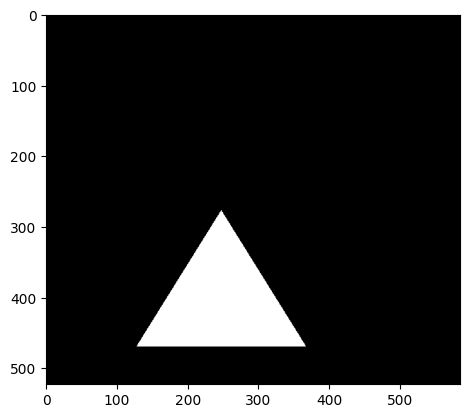

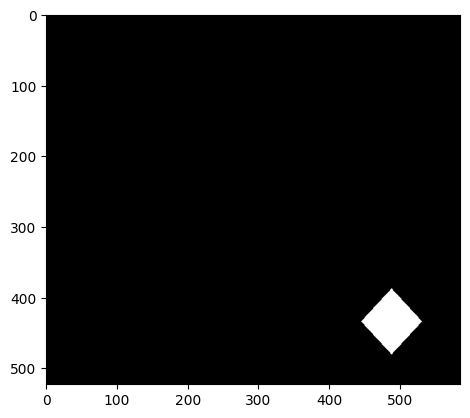

In [29]:
for label in v[1:]:    
    objeto = lab == label
    objeto = objeto.astype('uint8')
    plt.imshow(objeto, cmap='gray')
    plt.show()

## REGIONPROPS



(388, 445, 481, 531)


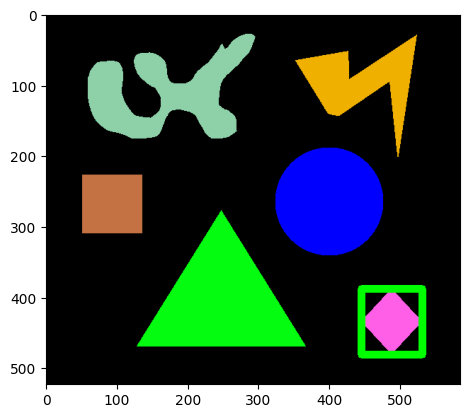

In [30]:
from skimage.measure import regionprops
# https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

# Después, podemos extraer la bounding box de dicho objeto
prop = regionprops(objeto)
bbox = prop[0].bbox
print(bbox)
start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
window = cv2.rectangle(img.copy(), start_point, end_point, (0, 255, 0), 10)
                     
plt.imshow(window, cmap='gray')
plt.show()

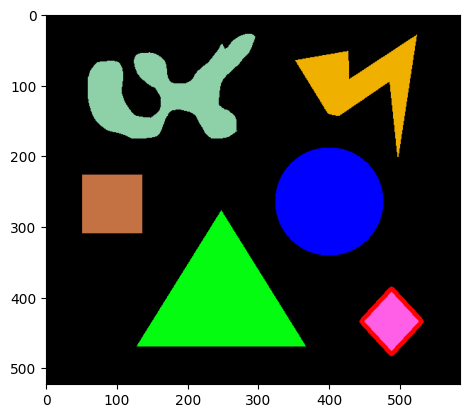

In [31]:
# Y la convex hull image
from skimage.morphology import convex_hull_image

convex_image = convex_hull_image(objeto)
convex_image = convex_image.astype('uint8')
# plt.imshow(convex_image, cmap='gray')
# plt.show()

conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Encontramos los contornos en una máscara 
imagen = cv2.drawContours(img.copy(), conts, -1, (255,0,0), 5) # Dibujamos los contornos
                     
plt.imshow(imagen, cmap='gray')
plt.show()

###  Repetimos el proceso completo para todos los objetos de la imagen

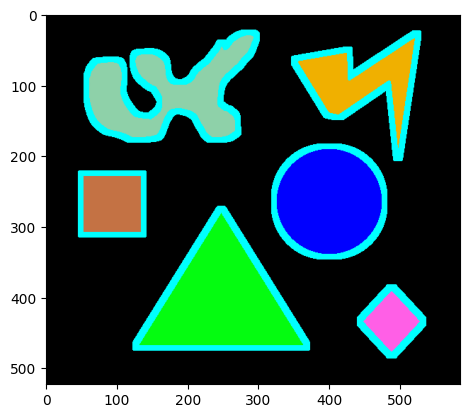

In [23]:
# Repetimos el proceso completo para todos los objetos de la imagen
imagen = img.copy()
for i in range(1, num+1): 
    objeto = lab == i
    objeto = objeto.astype('uint8')
    
    # bbox
    # prop = regionprops(objeto)
    # bbox = prop[0].bbox
    # imagen = cv2.rectangle(imagen, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 5)
    
    # # covex hull
    # convex_image = convex_hull_image(objeto)
    # convex_image = convex_image.astype('uint8')
    img_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    conts,_ = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imagen = cv2.drawContours(imagen, conts, -1, (0,255,255), 2)

plt.imshow(imagen, cmap='gray')
plt.show()

In [24]:
# !pip install tabulate

In [25]:
# Vamos a extraer diferentes descriptores geométricos que nos ayudarán a caracterizar los objetos.
# pip install tabulate
from tabulate import tabulate
import math
# _, mask = cv2.threshold(img_gray,0,1,cv2.THRESH_OTSU).astype(np.float)
new_lab, new_num = label(mask, return_num=True)

# Extraemos las característicias geométricas

headers = ['','Raro', 'Rayo', 'Círculo', 'Cuadrado', 'Triángulo', 'Rombo']

A,BB,CA,E,ED,EX,MA,MiA,OR,P,S,CO,R = ['area'], ['bbox_area'], ['convex_area'], ['eccentricity'], ['equiv_diameter'], \
['extent'], ['major_axis'], ['minor_axis'], ['orientation'], ['perimeter'], ['solidity'], ['compactness'], ['rectangularity']

for i in range(1,new_num+1):
    objeto = new_lab == i
    prop = regionprops(objeto.astype(np.uint8))
    
    A.append(np.round(prop[0].area, 4))
    BB.append(np.round(prop[0].bbox_area, 4))
    CA.append(np.round(prop[0].convex_area, 4))
    E.append(np.round(prop[0].eccentricity, 4))
    ED.append(np.round(prop[0].equivalent_diameter, 4))
    EX.append(np.round(prop[0].extent, 4))
    MA.append(np.round(prop[0].major_axis_length, 4))
    MiA.append(np.round(prop[0].minor_axis_length, 4))
    OR.append(np.round(prop[0].orientation, 4))
    P.append(np.round(prop[0].perimeter, 4))
    S.append(np.round(prop[0].solidity, 4))
    CO.append(np.round(4*math.pi*prop[0].area/prop[0].perimeter**2, 4))
    R.append(np.round(prop[0].area/prop[0].bbox_area, 4))


my_data = [tuple(A), tuple(BB), tuple(CA), tuple(E), tuple(ED), tuple(EX), \
          tuple(MA), tuple(MiA), tuple(OR), tuple(P), tuple(S), tuple(CO), tuple(R)]

print(tabulate(my_data, headers=headers))

TypeError: 'numpy.int64' object is not callable